In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = int(10) #слой
u = np.zeros(N) #скорость жидкости
h = np.zeros(N) #толщина слоя жидкости
a = np.zeros(N) 
f1 = np.zeros(N)
f2 = np.zeros(N)
q1 = np.zeros(N)
q2 = np.zeros(N)
F1 = np.zeros(N)
F2 = np.zeros(N)
Q1 = np.zeros(N)
Q2 = np.zeros(N)
tt = np.zeros(N)
g = 9.8; #ускорение свободного падения

delta = 1./N
koef = 0.5*delta
i = 0

t = 0.0

def m_max(a, b):
    if a > b:
        return a
    else:
        return b
        
def m_min(a, b):
    if a < b:
        return a
    else:
        return b

#заполняем начальными данными
for j in range(N):
    if j <= N/2:
        h[j] = 2.0
    else:
        h[j] = 1.0

    a[j] = math.fabs(u[j]) + math.sqrt(g*h[j])
    
for j in range(N):
    f1[j] = h[j]*u[j]
    f2[j] = h[j]*u[j]*u[j]+g*h[j]*h[j]/2

for j in range(N):
    q1[j] = h[j]
    q2[j] = h[j]*u[j]

print(q1, q2)


[2. 2. 2. 2. 2. 2. 1. 1. 1. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
while True:
    #в точках j-0.5 и j+0.5 считаем задачу о распаде разрыва
    for j in range(N):

        if j == N-1:
            F1[j] = F1[j-1]
            F2[j] = F2[j-1]
            break
            
        Sr = m_max(u[j]+a[j], u[j+1]+a[j+1])
        Sl = m_min(u[j]-a[j], u[j+1]-a[j+1])
        
        if Sl >= 0:
            F1[j] = f1[j]
            F2[j] = f2[j]
        elif Sl < 0 and Sr > 0:
            F1[j] = (Sr*f1[j] - Sl*f1[j+1] + Sl*Sr*(q1[j+1] - q1[j])) / (Sr-Sl)
            F2[j] = (Sr*f2[j] - Sl*f2[j+1] + Sl*Sr*(q2[j+1] - q2[j])) / (Sr-Sl)
        elif Sr <= 0:
            F1[j] = f1[j+1]
            F2[j] = f2[j+1]
    #задача о распаде разрыва (окончание)

    delta_t = 1000000.0

    #определяем шаг расчётной сетки из критерия устойчивости Куранта-Фридрихса-Леви
    for j in range(N):
            
        tt[j] = koef / m_max(math.fabs(u[j] + a[j]), math.fabs(u[j] - a[j]))

        if tt[j] < delta_t:
            delta_t = tt[j]
            
    #Находим по схеме Годунова первого порядка точности консервативные переменные
    for j in range(1, N):
        q1[j] = q1[j] - (delta_t/delta) * (F1[j] - F1[j-1])
        q2[j] = q2[j] - (delta_t/delta) * (F2[j] - F2[j-1])+delta_t*g*h[j]
        
    t = t + delta_t
    i += 1

    #получаем значения на новом слое, выражая из консервативных переменных
    for j in range(N):
        u[j] = q2[j]/q1[j]
        h[j] = q1[j]
        a[j] = math.fabs(u[j]) + math.sqrt(g*h[j])

    if not t > 1.0:
        break
print(a)

[4.42718872 4.53786844 4.53786844 4.53786844 4.53786844 4.7420886
 4.25262208 3.24117489 3.24117489 3.24117489]


In [5]:
x = np.zeros(N)
xj = 0
for j in range(N):
    x[j] = xj
    xj += delta
 

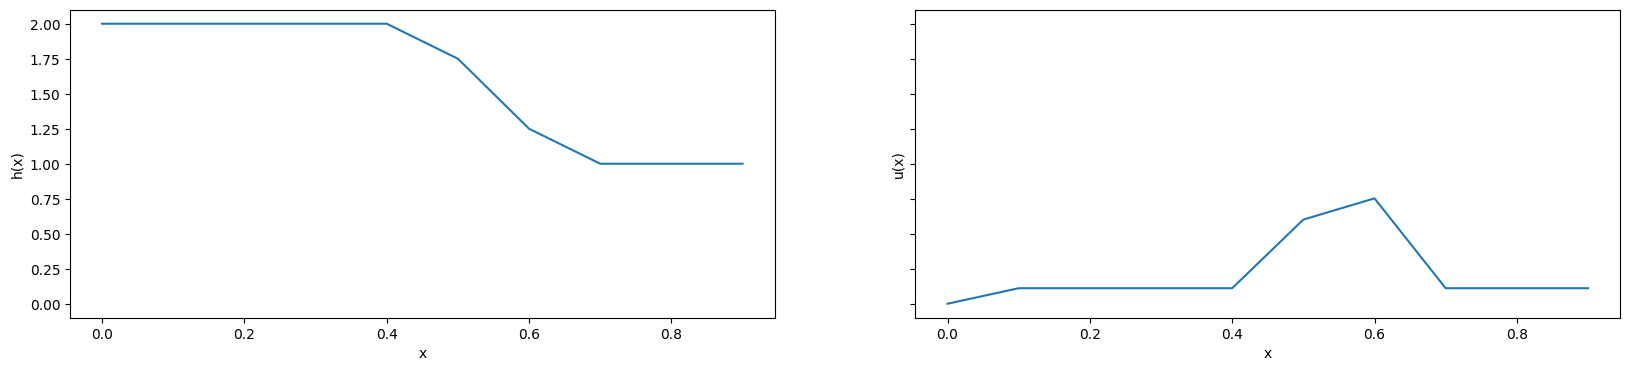

In [9]:
tails = ['h(x)', 'u(x)']
figure, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
ax[0].plot(x, h)
ax[1].plot(x, u)
ax[0].set_xlabel("x")
ax[1].set_xlabel("x")
ax[0].set_ylabel("h(x)")
ax[1].set_ylabel("u(x)")
plt.show()